In [33]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
import scipy.optimize as op
from sklearn.preprocessing import normalize
from scipy import linalg

# K-means Clustering

In [35]:
data = loadmat('data/ex7data2.mat')
x = data['X']

In [36]:
def kMeansInitCentroids(X, K):
    rand = np.random.choice(X.shape[0],K,replace=False)
    randx = X[rand,0]
    randy = X[rand,1]
    centroids = np.c_[randx,randy]
    return centroids


def findClosestCentroids(X, centroids):
    c = np.zeros( (X.shape[0], 1) )    
    for idx1, p in enumerate(X):
        min = 100000
        for idx2, cent in enumerate(centroids):
            if min > np.linalg.norm(p-cent):
                min = np.linalg.norm(p-cent)
                c[idx1] = idx2
    return c


def computeMeans(X, index, K):
    lengths = np.zeros((K,1))
    sums = np.zeros((K,2))
    index = index.astype(int)
    
    for idx, p in enumerate(X):
        sums[index[idx], 0] += p[0]
        sums[index[idx], 1] += p[1]
        lengths[index[idx]]+=1
        
    return sums/lengths

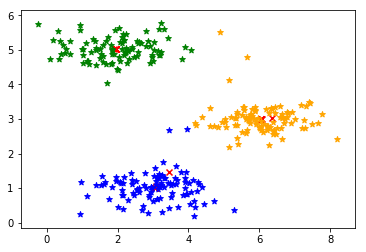

In [37]:
K = 3
iter_cnt = 15

centroids = kMeansInitCentroids(x,K)

for i in range(iter_cnt):
    index = findClosestCentroids(x,centroids)
    centroids = computeMeans(x,index,K)
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='r')

nx = np.c_[x,index]
for n in nx:
    if n[2] == 0:
        plt.scatter(n[0], n[1], marker='*', c='blue')
    elif n[2] == 1:
        plt.scatter(n[0], n[1], marker='*', c='green')
    else:
        plt.scatter(n[0], n[1], marker='*', c='orange')

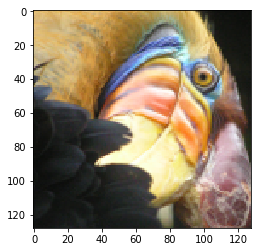

In [38]:
img = plt.imread('data/bird_small.png')
img_data = img.reshape(128*128,3)/255
plt.imshow(img)

In [39]:
def kMeansInitCentroids3D(X, K):
    rand = np.random.choice(X.shape[0],K,replace=False)
    randx = X[rand,0]
    randy = X[rand,1]
    randz = X[rand,2]
    centroids = np.c_[randx,randy,randz]
    return centroids


def findClosestCentroids3D(X, centroids):
    c = np.zeros( (X.shape[0], 1) )    
    for idx1, p in enumerate(X):
        min = 999999999
        for idx2, cent in enumerate(centroids):
            if min > np.linalg.norm(p-cent):
                min = np.linalg.norm(p-cent)
                c[idx1] = idx2
    return c


def computeMeans3D(X, index, K):
    lengths = np.zeros((K,1))
    sums = np.zeros((K,3))
    index = index.astype(int)
    
    for idx, p in enumerate(X):
        sums[index[idx], 0] += p[0]
        sums[index[idx], 1] += p[1]
        sums[index[idx], 2] += p[2]
        lengths[index[idx]]+=1
        
    return sums/lengths

In [40]:
K = 16
iter_cnt = 10

centroids = kMeansInitCentroids3D(img_data,K)

for i in range(iter_cnt):
    index = findClosestCentroids3D(img_data,centroids)
    centroids = computeMeans3D(img_data,index,K)

nimg = np.c_[img_data,index]

<Figure size 432x288 with 0 Axes>

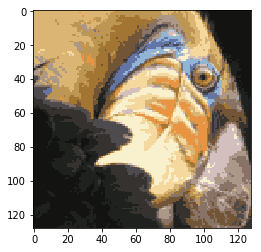

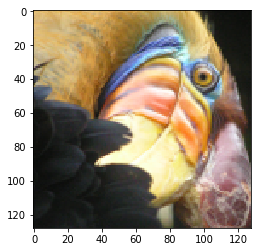

<Figure size 432x288 with 0 Axes>

In [41]:
ans = np.zeros((16384, 3))

for idx, dum in enumerate(nimg):
    ans[idx] = centroids[dum.astype(int)[3]]

    
plt.imshow(ans.reshape((128,128,3))*255)
plt.figure()
plt.imshow(img)
plt.figure()

# Principal Component Analysis 

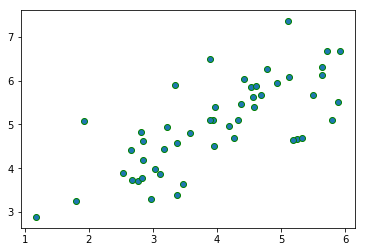

In [42]:
d2 = loadmat('data/ex7data1.mat')
d2x = d2['X']
plt.scatter(d2x[:,0],d2x[:,1],facecolors=None, edgecolors='g')

In [43]:
def featureNormalize(x):
    return normalize(x, axis=0)


def covarianceMatrix(x):
    m = x.shape[0]
    return x.T.dot(x)/m


def dimensionReduction(x, u, K):
    return x.dot(u[:,0:K])


def recoverData(x, u, K):
    return x.dot(u[:,0:K].T)

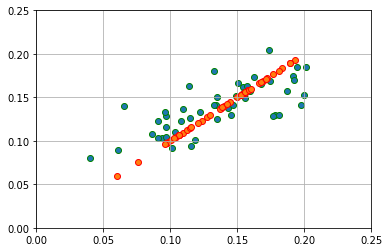

In [45]:
# First, normalize features from data
d2nx = featureNormalize(d2x)
# Then, calculate covariance Matrix from normalized data
cvm = covarianceMatrix(d2nx)

# calculate u, s, v (eigenvalues ... ) using svd
u, s, v = linalg.svd(cvm, full_matrices = True, compute_uv = True)

# reduce into 1-dimension using eigenvalue   
reduc = dimensionReduction(d2nx, u, 1)

# recover reduced data calculating dot product with transpose
recov = recoverData(reduc, u, 1)

plt.scatter(d2nx[:,0],d2nx[:,1],facecolors=None, edgecolors='g')
plt.scatter(recov[:,0],recov[:,1], facecolors=None, edgecolors='r')

plt.xlim(0, 0.25)
plt.ylim(0, 0.25)
plt.grid()

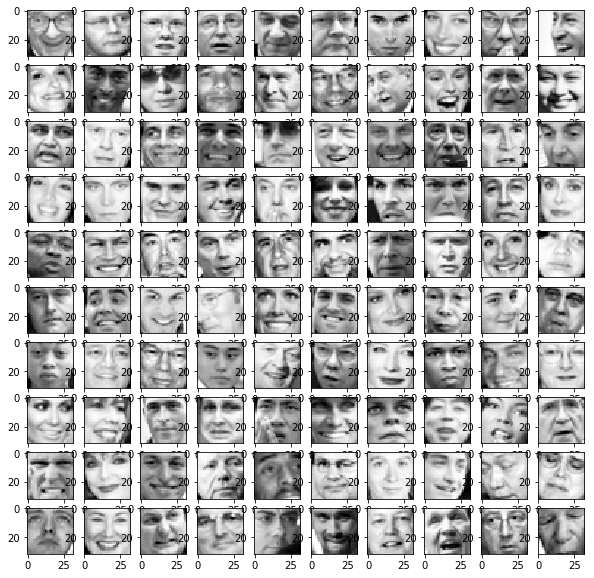

In [46]:
data_face = loadmat('data/ex7faces.mat')
img_face = data_face['X']

# plot face dataset
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(100):
    axes.flatten()[i].imshow(img_face[i,:].reshape(32,32).T, cmap='Greys_r')

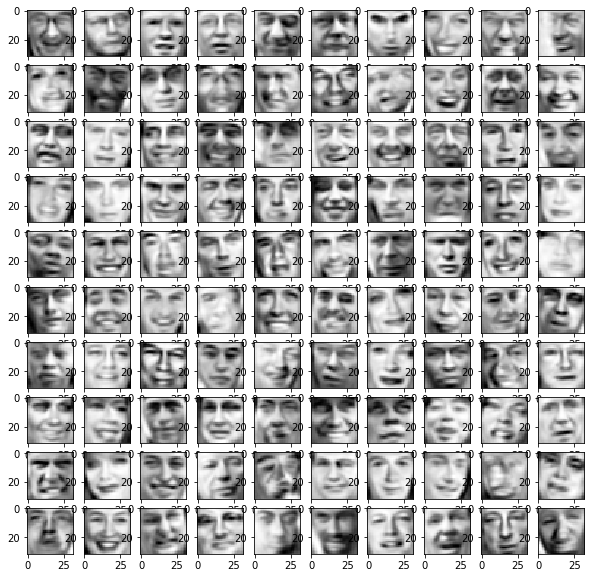

In [47]:
# first, normalize face data
nimg_face = featureNormalize(img_face)
# then, calculate covariance Matrix
cvm_face = covarianceMatrix(nimg_face)
 
# calculate eigen value (unitary matrices)
u, s, v = linalg.svd(cvm_face, full_matrices = True, compute_uv = True)

# set dimension to 100, which will get 0~99 features from unitary value 
# and it'll reduce data into 100-dimension data
dimension = 100
red = dimensionReduction(nimg_face, u, dimension)
recov = recoverData(red, u, dimension)

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(100):
    axes.flatten()[i].imshow(recov[i,:].reshape(32,32).T, cmap='Greys_r')


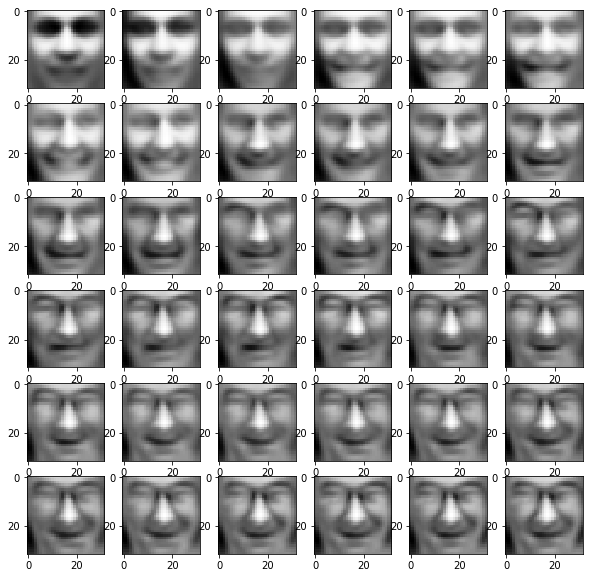

In [48]:
# it shows how does face data change when increasing dimension from 0 to 72.    

nimg_face = featureNormalize(img_face)
cvm_face = covarianceMatrix(nimg_face)

u, s, v = linalg.svd(cvm_face, full_matrices = True, compute_uv = True)

fig, axes = plt.subplots(6, 6, figsize=(10, 10))
for dimension in range(36):
    red = dimensionReduction(nimg_face, u, (dimension+1)*2)
    recov = recoverData(red, u, (dimension+1)*2)
    axes.flatten()[dimension].imshow(recov[0,:].reshape(32,32).T, cmap='Greys_r')
